<a href="https://colab.research.google.com/github/manikandanhereby/Credit_Risk_Modelling/blob/main/credit_risk_modelling_course_workout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O loan_data.csv https://www.dropbox.com/s/zyj7gwk8j7al88t/loan_data_2007_2014.csv?dl=0

--2023-05-11 05:18:38--  https://www.dropbox.com/s/zyj7gwk8j7al88t/loan_data_2007_2014.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zyj7gwk8j7al88t/loan_data_2007_2014.csv [following]
--2023-05-11 05:18:39--  https://www.dropbox.com/s/raw/zyj7gwk8j7al88t/loan_data_2007_2014.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4ef7269b89ec984f3f8e4579d.dl.dropboxusercontent.com/cd/0/inline/B71OQmCXHsW7iMSPJ5rKUYmGLm6VSrJ7bwy1rdRKBa65sSnMvpNbFssgY9A6B8q-JkNPSm81X-yZRDhJD2hH2DkqJtiaP-wmZ4JRMfEA0YR6K6bjykDJsH6fErpn3WYJZ61Wr2mNI5CV1_Aa0dM6kXt9g_EZm7E6SUxx9lrOnnLV5A/file# [following]
--2023-05-11 05:18:39--  https://uca4ef7269b89ec984f3f8e4579d.dl.dropboxusercontent.com/cd/0/inline/B71OQmCXHsW7iMSPJ5rKUYmGLm6VSrJ7bwy1rdRKB

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
loan_data = pd.read_csv('/content/loan_data.csv')

<ipython-input-3-e3a2826e2130>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('/content/loan_data.csv')


In [4]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Preprocessing Data

In [7]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
#using str.replace

loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')

<ipython-input-8-b2a8b3758ce2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [9]:
loan_data['emp_length_int'].unique()

array(['10', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 years', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', str(0))

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('<', '')

In [12]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' ', '')

In [13]:
loan_data['emp_length_int'].unique()

array(['10', '30', '80', '90', '40', '50', '60', '20', '70', nan],
      dtype=object)

In [14]:
type(loan_data['emp_length_int'][0])

str

In [15]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [16]:
type(loan_data['emp_length_int'])

pandas.core.series.Series

In [17]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [18]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [19]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [21]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/ np.timedelta64(1,'M')))

In [22]:
loan_data['mths_since_earliest_cr_line']

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [23]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [24]:
#Negative time distance not possible

loan_data.loc[:,['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [25]:
loan_data.shape

(466285, 78)

In [26]:
loan_data['mths_since_earliest_cr_line'].max()

587.0

In [27]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-27-b39582b064cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()


In [28]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

## Homework

In this homework, your task is to preprocess the ‘term’ variable and the ‘issue_d’ variable, similarly to the ‘employment length’ variable and the ‘earliest credit line variable’ we preprocessed in the last lecture.

1. From the variable ‘term’, which is of object (text string) data type, create a new variable, named ‘term_int’, which is numeric and contains the term of the loan in months.

Tips: First remove the unnecessary text from each row; then, turn what remains into a numeric variable.

2. From the variable ‘issue date’ (‘issue_d’), which is of object (text string) data type, create a new variable, named ‘mths_since_issue_d’ (‘months since issue date’).

Tips: First turn the test strings into dates; then calculate the difference between December 1st 2017 and each of the issue dates, in months; finally, check if the values make sense.

In [29]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [30]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [31]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ','')

In [32]:
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [33]:
type(loan_data['term_int'][0])

str

In [34]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [35]:
type(loan_data['term_int'][0])

numpy.int64

In [36]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [37]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [38]:
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
loan_data['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/np.timedelta64(1,"M"))

In [40]:
type(loan_data['mths_since_issue_d'][0])

numpy.float64

## Preprocessing few discrete variables



1.   grade
2. sub grade
Create dummy variables for the discrete
1 for yes
0 for no
eg., biological sex: Female or Male
M=1 and F=0




In [41]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [42]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [43]:
pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep='-')

,grade-A,grade-B,grade-C,grade-D,grade-E,grade-F,grade-G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [44]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix="grade", prefix_sep = '-'),
                     pd.get_dummies(loan_data['sub_grade'], prefix="sub_grade", prefix_sep = '-'),
                     pd.get_dummies(loan_data['home_ownership'], prefix="home_ownership", prefix_sep = '-'),
                     pd.get_dummies(loan_data['verification_status'], prefix="verification_status", prefix_sep = '-'),
                     pd.get_dummies(loan_data['loan_status'], prefix="loan_status", prefix_sep = '-'),
                     pd.get_dummies(loan_data['purpose'], prefix="purpose", prefix_sep = '-'),
                     pd.get_dummies(loan_data['addr_state'], prefix="addr_state", prefix_sep = '-'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix="initial_list_status", prefix_sep = '-')]

In [45]:
loan_data_dummies

[        grade-A  grade-B  grade-C  grade-D  grade-E  grade-F  grade-G
 0             0        1        0        0        0        0        0
 1             0        0        1        0        0        0        0
 2             0        0        1        0        0        0        0
 3             0        0        1        0        0        0        0
 4             0        1        0        0        0        0        0
 ...         ...      ...      ...      ...      ...      ...      ...
 466280        0        0        1        0        0        0        0
 466281        0        0        0        1        0        0        0
 466282        0        0        0        1        0        0        0
 466283        1        0        0        0        0        0        0
 466284        0        0        0        1        0        0        0
 
 [466285 rows x 7 columns],
         sub_grade-A1  sub_grade-A2  sub_grade-A3  sub_grade-A4  sub_grade-A5  \
 0                  0             0  

In [46]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [47]:
loan_data_dummies

,grade-A,grade-B,grade-C,grade-D,grade-E,grade-F,grade-G,sub_grade-A1,sub_grade-A2,sub_grade-A3,...,addr_state-TX,addr_state-UT,addr_state-VA,addr_state-VT,addr_state-WA,addr_state-WI,addr_state-WV,addr_state-WY,initial_list_status-f,initial_list_status-w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
  type(loan_data_dummies)

pandas.core.frame.DataFrame

In [49]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

In [50]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [51]:
loan_data.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state-WI            0
addr_state-WV            0
addr_state-WY            0
initial_list_status-f    0
initial_list_status-w    0
Length: 207, dtype: int64

In [52]:
pd.options.display.max_rows=100

In [53]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [54]:
loan_data['total_rev_hi_lim'].isna().sum()

0

## Homework 2:

In this homework, your task is to fill in the missing values for the remaining variables we are going to use in our models.

Here are the instructions about what values to replace the missing values with for the remaining variables.

1. For annual income (‘annual_inc’), replace the missing values with the mean of the non-missing values of the variable.

2. For all of the following variables, replace the missing values with zeroes:

‘mths_since_earliest_cr_line’

‘acc_now_delinq’

‘total_acc’

‘pub_rec’

‘open_acc’

‘inq_last_6mths’

‘delinq_2yrs’

‘emp_length_int’

In [55]:
loan_data['annual_inc'].isnull().sum()

4

In [56]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [57]:
loan_data['annual_inc'].isnull().sum()

0

In [58]:
loan_data['mths_since_earliest_cr_line'].isna().sum()

29

In [59]:
loan_data['mths_since_earliest_cr_line'].mean()

242.38537412923372

In [60]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)

In [61]:
loan_data['mths_since_earliest_cr_line'].isna().sum()

0

In [62]:
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [63]:
from IPython import display

# Display the DataFrame
display.display(loan_data)

# Adjust the output height to 300px.
display.Javascript("google.colab.output.setIframeHeight('300px');")

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state-TX,addr_state-UT,addr_state-VA,addr_state-VT,addr_state-WA,addr_state-WI,addr_state-WV,addr_state-WY,initial_list_status-f,initial_list_status-w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,0,1,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,1,0,0,0,0,0,0,0,0,1
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,0,0,0,0,0,0,0,0,1,0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,0,0,0,0,0,0,0,0,1,0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [64]:
loan_data.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state-WI            0
addr_state-WV            0
addr_state-WY            0
initial_list_status-f    0
initial_list_status-w    0
Length: 207, dtype: int64

In [65]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [66]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [67]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [68]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),0,1)

In [69]:
loan_data['good_bad'].unique()

array([1, 0])

# Splitting the data into Train and Test

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state-UT', 'addr_state-VA', 'addr_state-VT', 'addr_state-WA',
       'addr_state-WI', 'addr_state-WV', 'addr_state-WY',
       'initial_list_status-f', 'initial_list_status-w', 'good_bad'],
      dtype='object', length=208)

In [72]:
X = loan_data.drop('good_bad', axis=1)

In [73]:
y = loan_data['good_bad']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
X_train.shape

(373028, 207)

In [76]:
y_train.shape

(373028,)

In [77]:
X_test.shape

(93257, 207)

In [78]:
y_test.shape

(93257,)

In [79]:
loan_data.shape

(466285, 208)

#Data Preparation

In [80]:
df_inputs_prepr = X_train
df_targets_prepr = y_train

In [81]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [82]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)

In [83]:
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


intention: We have to find out how many attributes of good_bad feature in grade A, B and so on...
For this we use groupby() function
groupby grades upon good_bad columns with count of the later ones

In [84]:
t1 = df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count() #as_index=False, otherwise, grade will be considered as index by default

proportion of good borrowers calculation?


In [85]:
t2 = df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

In [86]:
#merging both the dataframes

df1 = pd.concat([t1,t2], axis=1)

In [87]:
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [88]:
df1 = df1.iloc[:,[0,1,3]]

In [89]:
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [90]:
df1.columns = [df1.columns.values[0], 'n_obs', 'props_good']

In [91]:
df1

,grade,n_obs,props_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


Automating calculations

In [92]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [93]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


# Visualization of results

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [98]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [99]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
  xp = np.array(df_WoE.iloc[:,0].apply(str))
  yp = df_WoE['WoE']
  plt.figure(figsize = (18,6))
  plt.plot(xp,yp, marker = 'o', linestyle = '--', color = 'k')
  plt.xlabel('df_WoE.columns[0]')
  plt.ylabel('Weight of Evidence')
  plt.title(str("Weight of Evidence by " + df_WoE.columns[0]))
  plt.xticks(rotation = rotation_of_x_axis_labels)

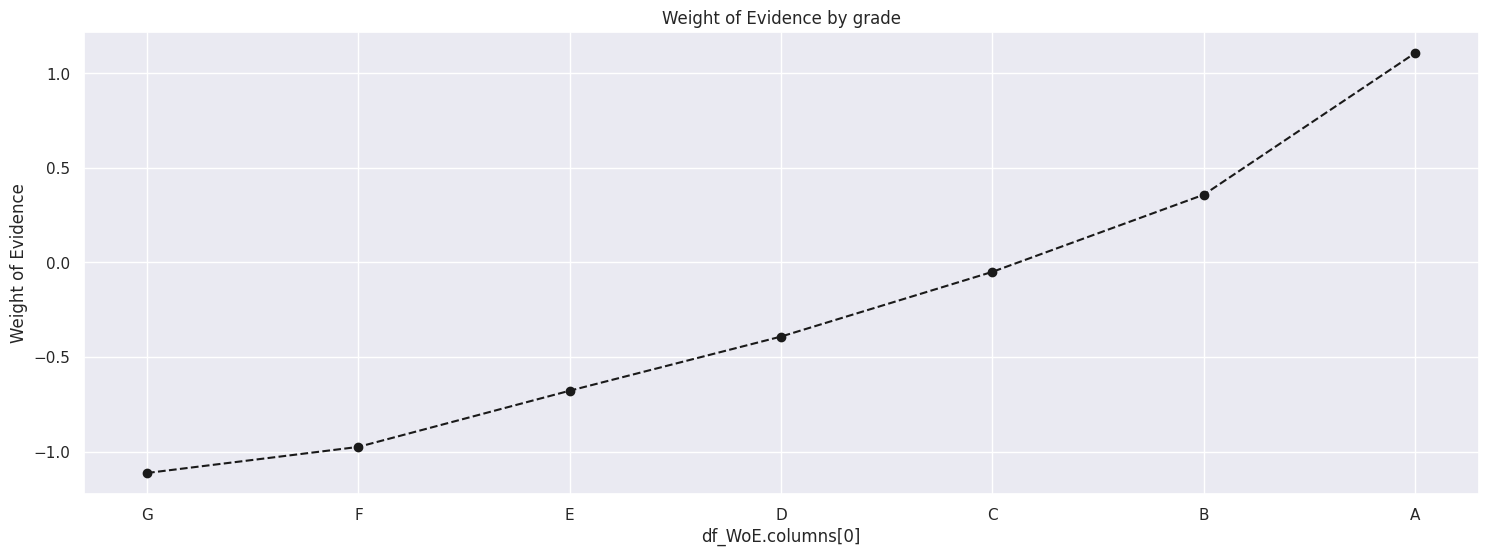

In [100]:
plot_by_woe(df_temp)